# Health care: Heart attack possibility

In this project, we will find out the predict the presence of a heart disease based on certain factors.
(The data is taken from Naresh Bhat - Kaggle - https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

We have the following values present in the dataset -

1) age

2) sex: sex (1 = male; 0 = female)

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6) fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11) the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

Target is the dependent/output variable and rest are the features(independent variables)

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
import cufflinks as cf
cf.go_offline()

In [175]:
heart = pd.read_csv("heart.csv")

In [176]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [177]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [178]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [179]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Exploratory Data Analysis

Let us start by seeing how many people have heart disease in our dataset.
Let us see how spread out our target variable is-

<Axes: >

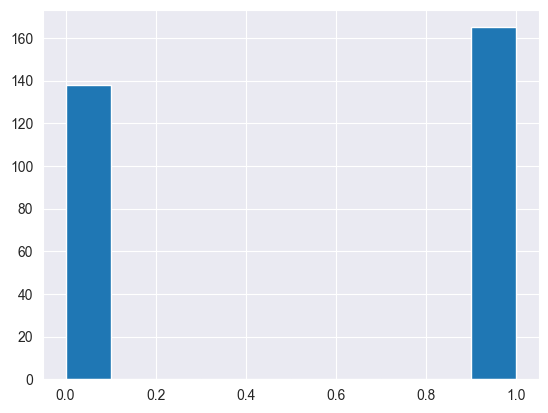

In [180]:
heart["target"].hist()

Let us now observe how correlated our features are -

<Axes: >

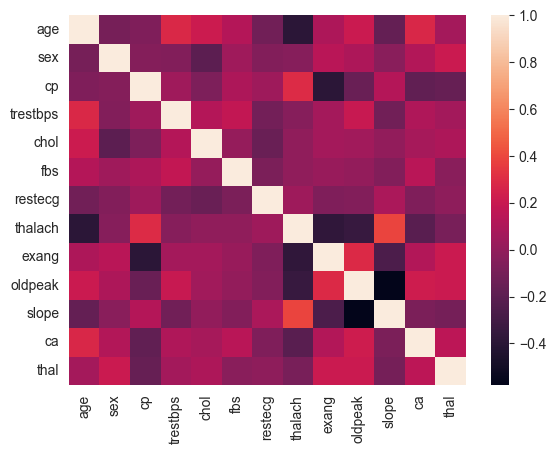

In [181]:
sns.heatmap(heart.iloc[:,:-1].corr())

Let us also check for any null/missing values in our data-

<Axes: >

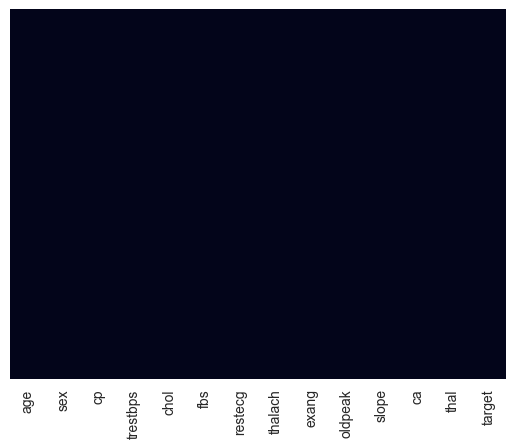

In [182]:
sns.heatmap(heart.isnull(), yticklabels=False, cbar=False)

Looks like all our values are present

Now we will see how the different features affect the Target variable

In [183]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target', ylabel='age'>

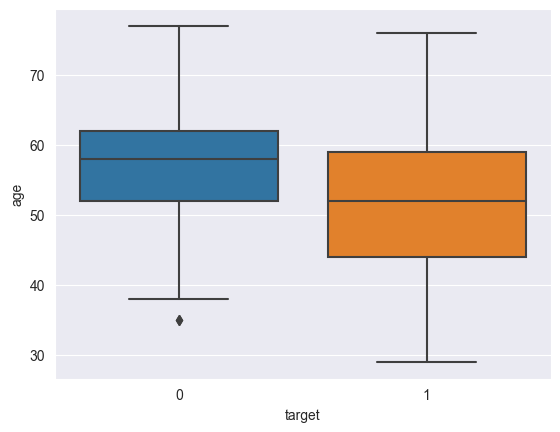

In [184]:
sns.boxplot(data=heart, y="age",x="target")

In [185]:
heart.pivot(values="age",columns="target").iplot(kind="box")

We notice that age group - 44 to 59 tend to be battling more heart diseases in general.

Let us now see the relationship between the sex of a person and disease presence

<Axes: xlabel='target', ylabel='count'>

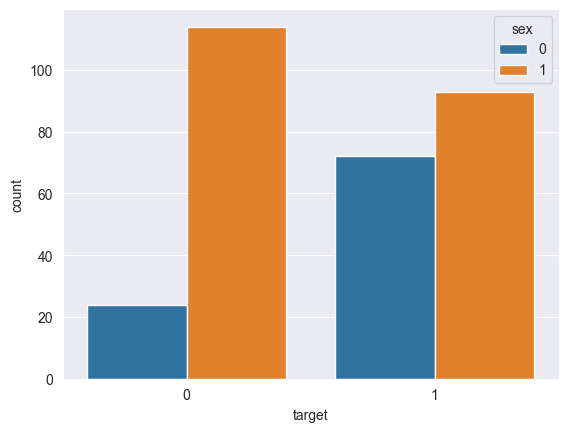

In [186]:
sns.countplot(x="target", data=heart, hue="sex")

Disease is present in male population more than females

In [187]:
heart["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

But also, we have more male members in our population(almost 70%). So study is more focused on males

Let us now notice the relationship with cholestrol

In [188]:
heart.pivot(values="chol",columns="target").iplot(kind="box",x="Target", xTitle="Target", yTitle = "Cholestrol" )

People with heart diseases tend to have a higher cholestrol

Now let us see a relationship between all features

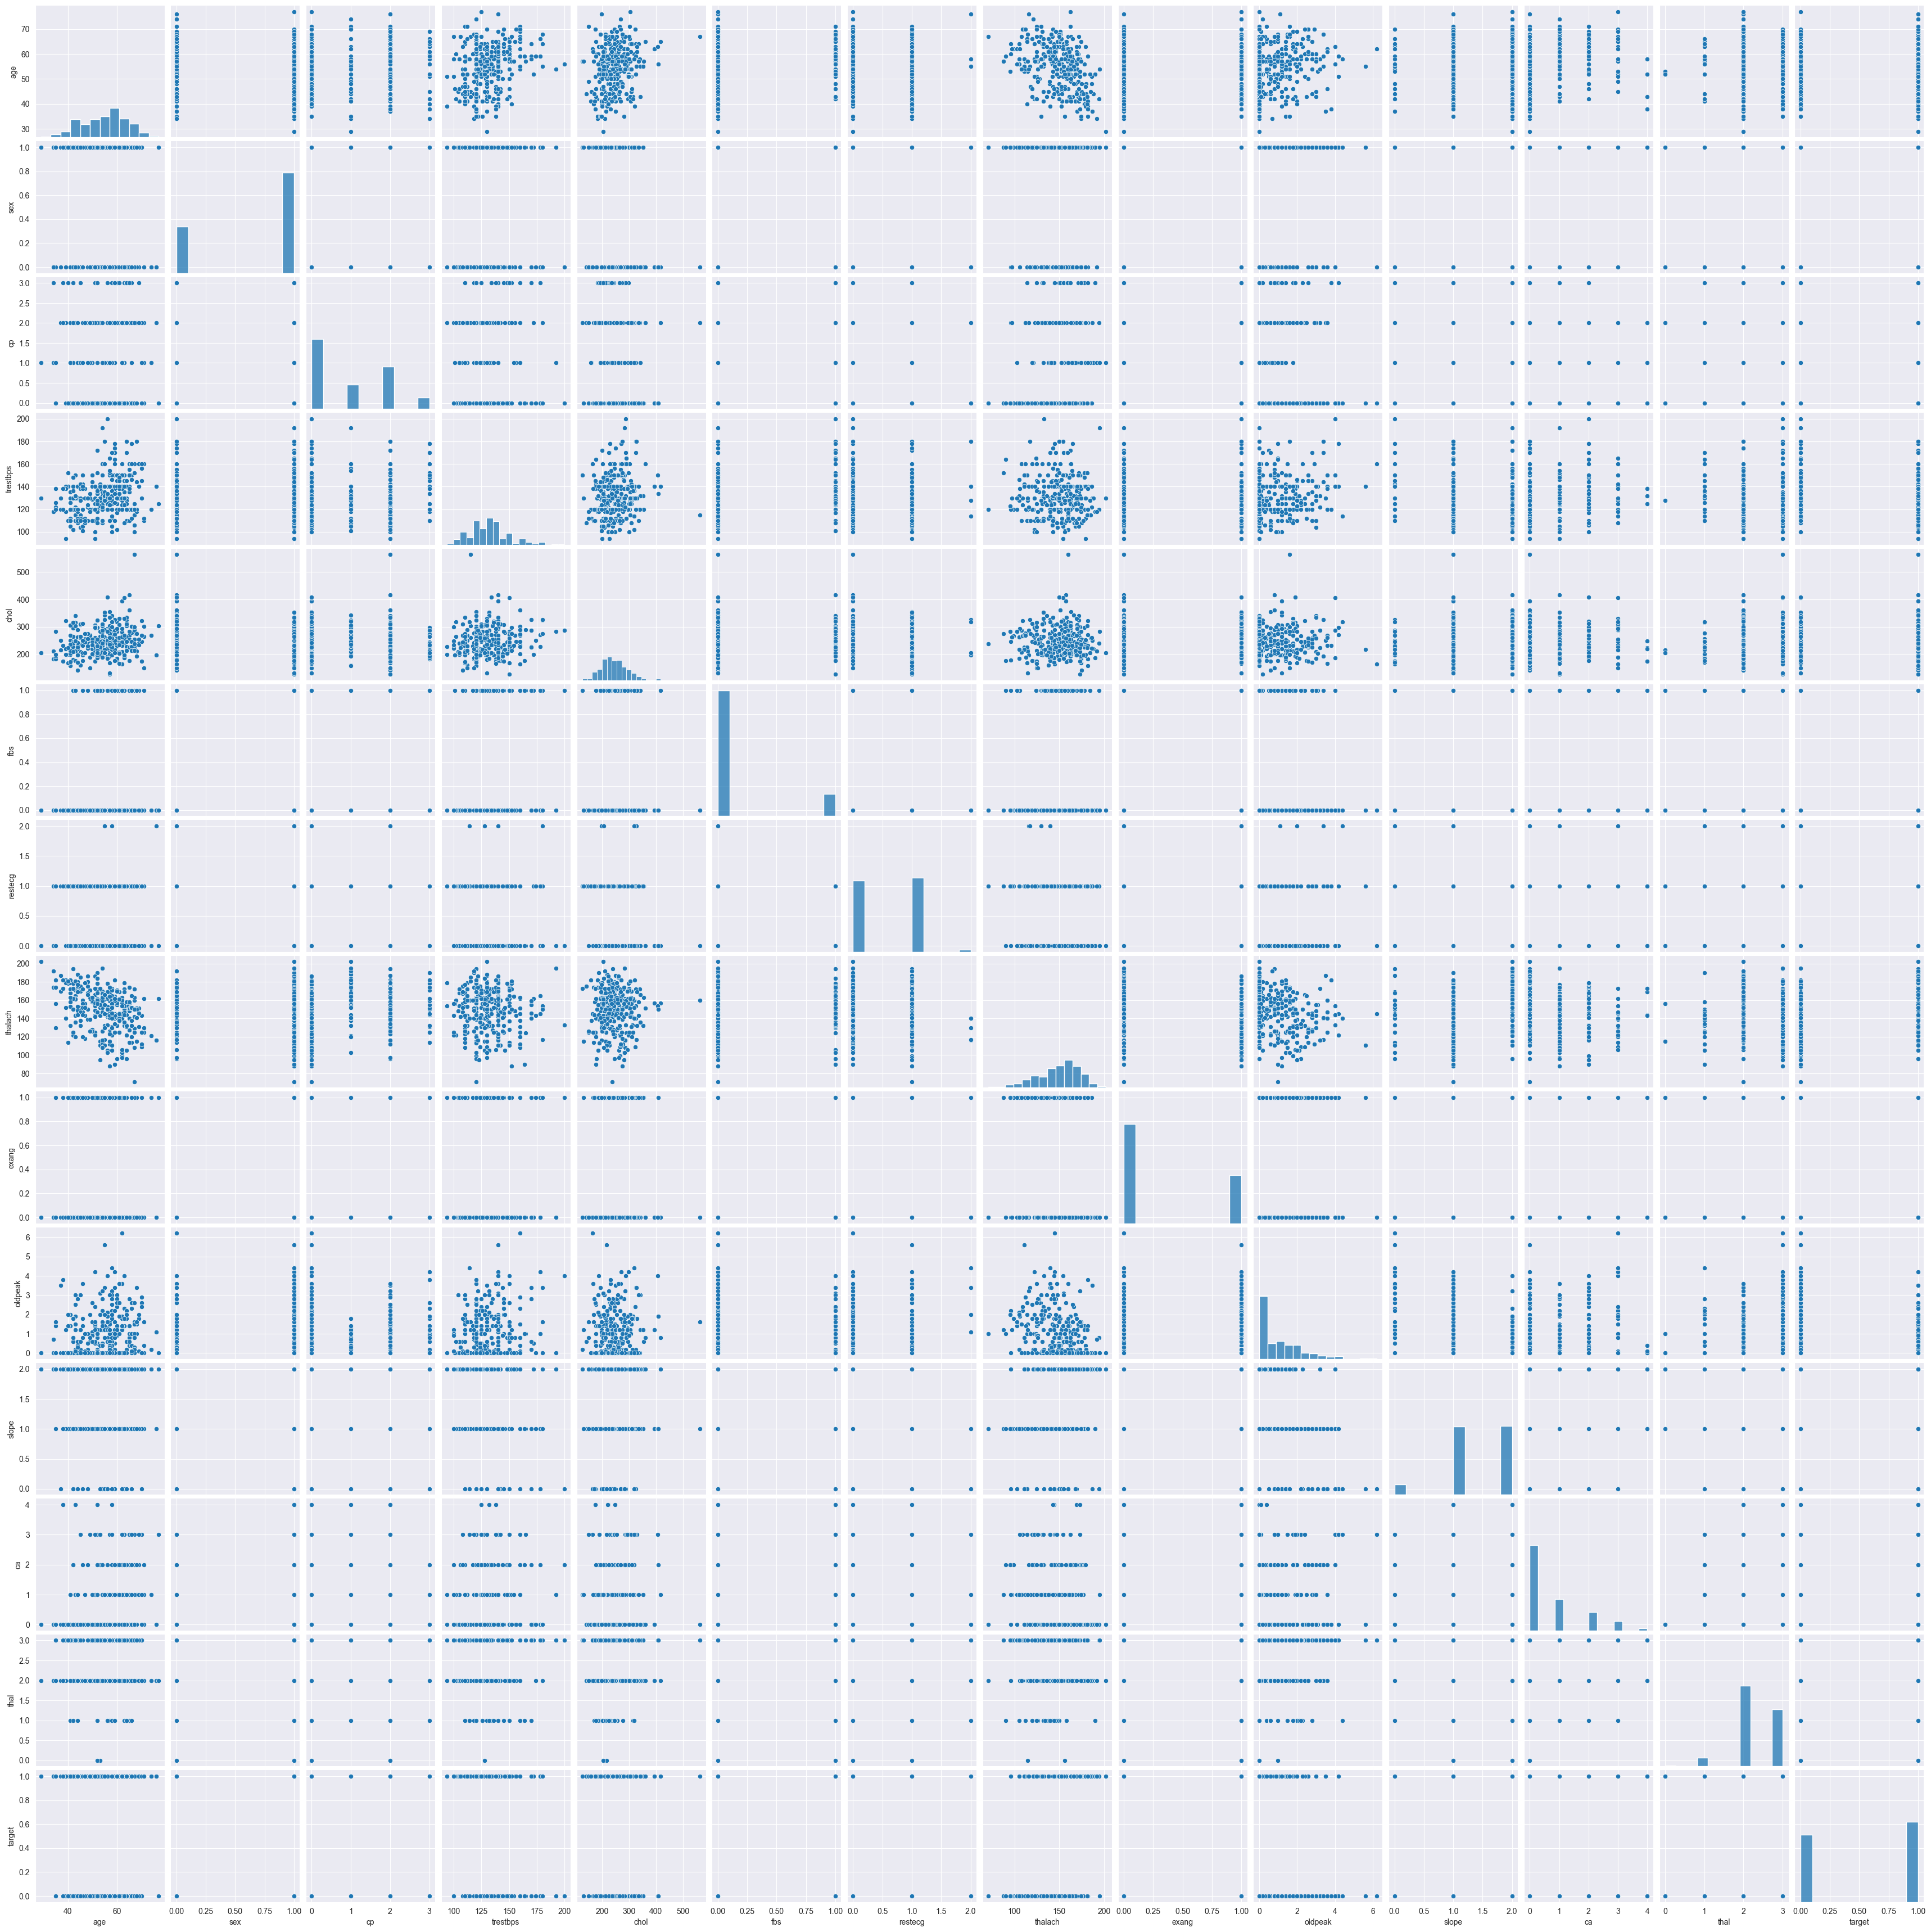

In [189]:
sns.pairplot(heart)

## Scaling Data

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [191]:
scaler.fit(heart.drop("target", axis =1))

StandardScaler()

In [248]:
heart_scaled = scaler.transform(heart.drop("target", axis = 1))
heart_scaled = pd.DataFrame(heart_scaled, columns = heart.columns[:-1])

In [249]:
X = heart_scaled
y = heart["target"]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [196]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [197]:
X = heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = heart["target"]

In [198]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [199]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [200]:
predictions = model.predict(X_test)

In [201]:
from sklearn.metrics import classification_report, confusion_matrix

In [202]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [203]:
confusion_matrix(y_test, predictions)

array([[35,  9],
       [ 4, 43]], dtype=int64)

In [204]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [205]:
y_test

221    0
8      1
89     1
154    1
201    0
      ..
247    0
85     1
280    0
31     1
190    0
Name: target, Length: 91, dtype: int64

In [206]:
y_test.iplot(kind="hist")
pd.DataFrame(predictions).iplot(kind="hist")

<Axes: ylabel='Count'>

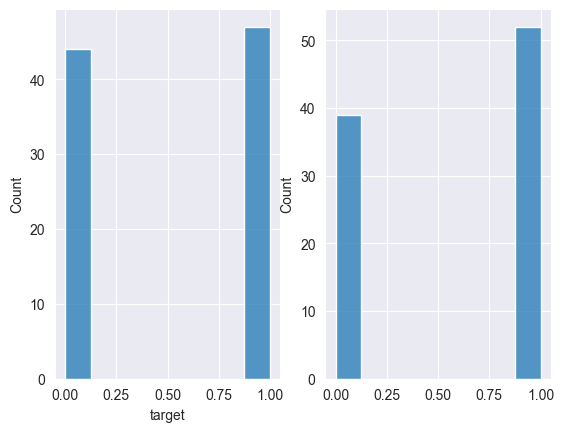

In [207]:
_, axes = plt.subplots(ncols=2)
sns.histplot(y_test, ax=axes[0])
sns.histplot(predictions, ax=axes[1])

In [208]:
y_test

221    0
8      1
89     1
154    1
201    0
      ..
247    0
85     1
280    0
31     1
190    0
Name: target, Length: 91, dtype: int64

In [209]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

## Naive Bayes Theorem

In [210]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

We have a lot of categorical values. So it is good for Naive Bayes.
Let us check if the few continuous values follow a normal distribution

In [211]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='age', ylabel='Count'>

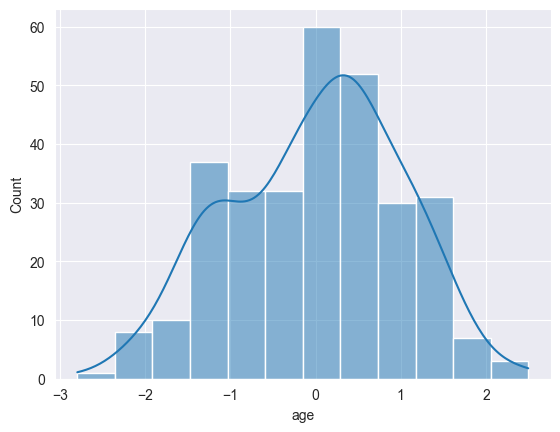

In [250]:
sns.histplot(data=heart_scaled,x="age",kde=True)

<Axes: xlabel='trestbps', ylabel='Count'>

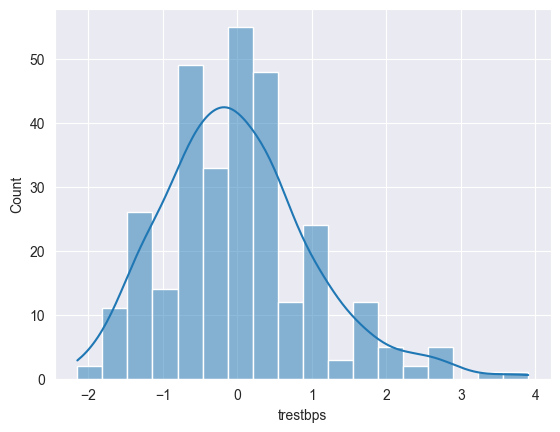

In [251]:
sns.histplot(data=heart_scaled,x="trestbps",kde=True)

<Axes: xlabel='chol', ylabel='Count'>

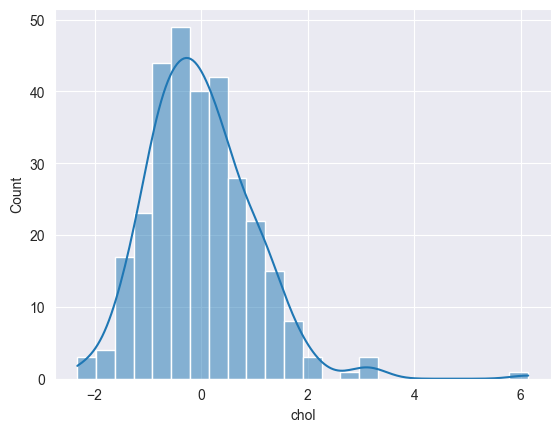

In [252]:
sns.histplot(data=heart_scaled,x="chol",kde=True)

<Axes: xlabel='thalach', ylabel='Count'>

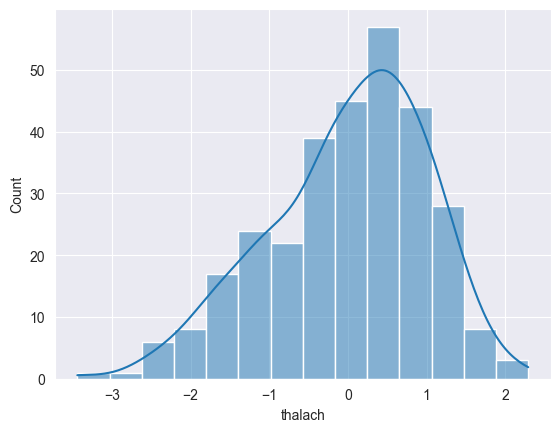

In [253]:
sns.histplot(data=heart_scaled,x="thalach",kde=True)

<Axes: xlabel='oldpeak', ylabel='Count'>

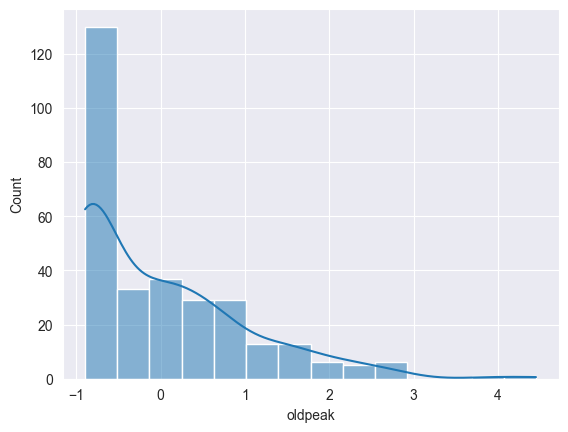

In [254]:
sns.histplot(data=heart_scaled,x="oldpeak",kde=True)

Most of them appear to be almost gaussian. Let us go ahead and train a Naive Bayes model

In [240]:
from sklearn.naive_bayes import GaussianNB

In [241]:
nb_model = GaussianNB()

In [242]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [243]:
nb_model.score(X_test, y_test)

0.8351648351648352

In [244]:
predictions = nb_model.predict(X_test)

In [245]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [246]:
confusion_matrix(y_test, predictions)

array([[36,  8],
       [ 7, 40]], dtype=int64)

So our model works well. 
A half-normal curve is still considered normal distribution(specail case - folded normal distribtion)

Logistic Regression worked the best in this case!

## KNN Classifier

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [234]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.sum(y_test - pred))

<Axes: >

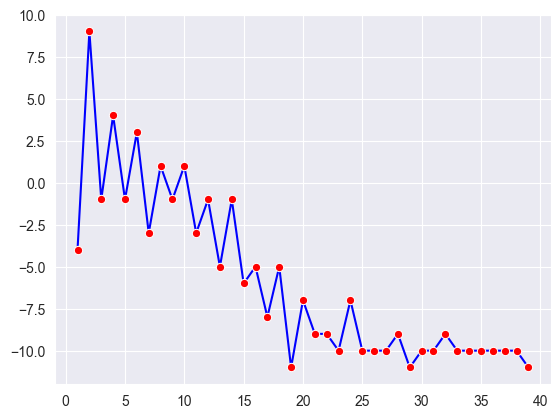

In [235]:
sns.lineplot(x = range(1, 40), y = error, marker = "o", color = "blue", markerfacecolor= "red")

k = 33 to 38 is stable

k = 19 and 29 seems apt amongst all

In [236]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [237]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        44
           1       0.79      0.98      0.88        47

    accuracy                           0.86        91
   macro avg       0.88      0.85      0.85        91
weighted avg       0.88      0.86      0.85        91

[[32 12]
 [ 1 46]]


In [238]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [239]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        44
           1       0.79      0.98      0.88        47

    accuracy                           0.86        91
   macro avg       0.88      0.85      0.85        91
weighted avg       0.88      0.86      0.85        91

[[32 12]
 [ 1 46]]


KNN has the best predictions amongst all.

### End!